In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')

In [2]:
TMA_lon=[9.59556, 11.7944, 11.8494, 12.0989, 12.3611, 12.3394, 12.3417, 12.2917, 11.8292, 11.6958, 11.0722, 10.95, 10.5583, 10.1, 9.59556];

TMA_lat=[59.7097, 59.3667, 59.8333, 59.8906, 60.2236, 60.4039, 60.5, 60.7125, 60.875, 60.7972, 60.8778, 60.9389, 60.925, 60.7292, 59.7097];

In [3]:
# no sign for lat because of 'N'
# no sign for lon because of 'E'
def dms2dd(as_string):
    degrees = int(as_string[:2])
    minutes = int(as_string[2:4])
    seconds = float(as_string[4:8])
    lat_dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    degrees = 1*int(as_string[11:14])
    minutes = 1*int(as_string[14:16])
    seconds = 1*float(as_string[16:21])
    lon_dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);

    return lat_dd, lon_dd;

In [4]:
# Runway 01L end COORD
# 601257.84N 0110529.99E
    
# Runway 19R end COORD
# 601106.00N 0110425.48E
    
# Runway 01R end COORD
# 601204.35N 0110720.95E
    
# Runway 19L end COORD
# 601032.72N 0110628.02E
    
rwy01L_end_lat, rwy01L_end_lon = dms2dd("601257.84N 0110529.99E")

rwy19R_end_lat, rwy19R_end_lon = dms2dd("601106.00N 0110425.48E")

rwy01R_end_lat, rwy01R_end_lon = dms2dd("601204.35N 0110720.95E")

rwy19L_end_lat, rwy19L_end_lon = dms2dd("601032.72N 0110628.02E")

print(rwy01L_end_lat, rwy01L_end_lon)
print(rwy19R_end_lat, rwy19R_end_lon)
print(rwy01R_end_lat, rwy01R_end_lon)
print(rwy19L_end_lat, rwy19L_end_lon)

60.216055555555556 11.09166388888889
60.184999999999995 11.073744444444444
60.20119444444445 11.122486111111112
60.17575 11.107783333333334


In [5]:
TMA_lon=[9.59556, 11.7944, 11.8494, 12.0989, 12.3611, 12.3394, 12.3417, 12.2917, 11.8292, 11.6958, 11.0722, 10.95, 10.5583, 10.1, 9.59556];

TMA_lat=[59.7097, 59.3667, 59.8333, 59.8906, 60.2236, 60.4039, 60.5, 60.7125, 60.875, 60.7972, 60.8778, 60.9389, 60.925, 60.7292, 59.7097];


central_lat = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
central_lon = min(TMA_lon) + (max(TMA_lon)-min(TMA_lon))/2

def plot_TMA_ENGM(ax):
       
    rwy01L_lon=[rwy19R_end_lon, rwy01L_end_lon];
    rwy01L_lat=[rwy19R_end_lat, rwy01L_end_lat];

    rwy19R_lon=[rwy01L_end_lon, rwy19R_end_lon];
    rwy19R_lat=[rwy01L_end_lat, rwy19R_end_lat];

    rwy01R_lon=[rwy19L_end_lon, rwy01R_end_lon];
    rwy01R_lat=[rwy19L_end_lat, rwy01R_end_lat];

    rwy19L_lon=[rwy01R_end_lon, rwy19L_end_lon];
    rwy19L_lat=[rwy01R_end_lat, rwy19L_end_lat];

    plt.plot(TMA_lon, TMA_lat, color="blue")
    
    plt.plot(rwy01L_lon, rwy01L_lat, color="red")
    plt.plot(rwy01R_lon, rwy01R_lat, color="red")
        
    center_circle_center_lon = 11.11
    center_circle_center_lat = 60.25
    left_circle_center_lon = 11.11
    left_circle_center_lat = 60.2
    down_circle_center_lon = 11.5
    down_circle_center_lat = 60.0
    up_circle_center_lon = 11.11
    up_circle_center_lat = 60.2
    
    circle = plt.Circle((center_circle_center_lon, center_circle_center_lat), 1.0, fill=False, color="red")
    #ax.add_patch(circle)
    circle = plt.Circle((left_circle_center_lon, left_circle_center_lat), 0.052, fill=False, color="red")
    #ax.add_patch(circle)
    circle = plt.Circle((down_circle_center_lon, down_circle_center_lat), 0.07, fill=False, color="red")
    #ax.add_patch(circle)
    circle = plt.Circle((up_circle_center_lon, up_circle_center_lat), 0.028, fill=False, color="red")
    #ax.add_patch(circle)

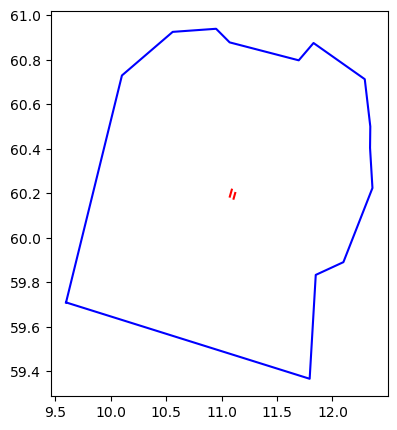

In [6]:
fig, ax = plt.subplots(1, 1,figsize=(5,5))

central_lat = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
central_lon = min(TMA_lon) + (max(TMA_lon)-min(TMA_lon))/2

# calculate the aspect ratio that will approximate a 
# Mercator projection at this central latitude 
mercator_aspect_ratio = 1/cos(radians(central_lat))

# set the aspect ratio of the axes to that
ax.set_aspect(mercator_aspect_ratio)
#ax.axis('equal')

plot_TMA_ENGM(ax)

#xlim = ax.get_xlim()
#ylim = ax.get_ylim()
#plt.xlim(xlim)
#plt.ylim(ylim)

In [60]:
 def plot_horizontal_profile_ENGM(df, title = ""):
        
    linewidth = 1
    
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    plt.title(title)
        
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_lat))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)
  
    # plot trajectories
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_ENGM(ax)
    
    if df.empty:
        return
    
    for flight_id, flight_df in df.groupby(level='flightId'):

        lons = []
        lats = []
                
        for seq, row in flight_df.groupby(level='sequence'):
                        
            lons.append(row['lon'].item())
            lats.append(row['lat'].item())
            
            #if len(row['lon'].to_list())>1:
            #    print(flight_id)
            
            #lons.append(row['lon'].to_list()[0])
            #lats.append(row['lat'].to_list()[0])
            
        last_points_lon = lons[-30:]
        last_points_lat = lats[-30:]
        #plt.plot(lon, lat, color='k', linewidth=linewidth)
        #plt.plot(lons, lats, color='grey', linewidth=linewidth)
        plt.plot(lons, lats, linewidth=linewidth)
        #plt.plot(last_points_lon, last_points_lat, color='r', linewidth=linewidth)

In [8]:
def plot_trajectories_first_point_ENGM(df, title = ""):
        
    linewidth = 1
    
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    plt.title(title)
        
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_lat))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)
    #ax.axis('equal')
  
    # plot trajectories
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_ENGM(ax)
    
    if df.empty:
        return
    
    for flight_id, flight_df in df.groupby(level='flightId'):

        lon = flight_df['lon'].to_list()[0]
        lat = flight_df['lat'].to_list()[0]
        
        if check_TMA_contains_point(Point(lon, lat)):
            print(flight_id)
        
        plt.plot(lon, lat, color='red', linewidth=linewidth, marker="o")
        #plt.plot(last_points_lon, last_points_lat, color='r', linewidth=linewidth)

# Data uploading

In [9]:
filename = "../data/ENGM/States_50NM/osn_arrival_ENGM_states_50NM_2019_10_week1.csv"
week1_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
week1_df.set_index(['flightId', 'sequence'], inplace = True)
num_flights1 = len(week1_df.groupby(level='flightId'))

filename = "../data/ENGM/States_50NM/osn_arrival_ENGM_states_50NM_2019_10_week2.csv"
week2_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
week2_df.set_index(['flightId', 'sequence'], inplace = True)
num_flights2 = len(week2_df.groupby(level='flightId'))

filename = "../data/ENGM/States_50NM/osn_arrival_ENGM_states_50NM_2019_10_week3.csv"
week3_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
week3_df.set_index(['flightId', 'sequence'], inplace = True)
num_flights3 = len(week3_df.groupby(level='flightId'))

filename = "../data/ENGM/States_50NM/osn_arrival_ENGM_states_50NM_2019_10_week4.csv"
week4_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
week4_df.set_index(['flightId', 'sequence'], inplace = True)
num_flights4 = len(week4_df.groupby(level='flightId'))

frames = [week1_df, week2_df, week3_df, week4_df]
month_df = pd.concat(frames)
num_flights = len(month_df.groupby(level='flightId'))
print(num_flights)

7863


In [10]:
filename = "../data/ENGM/Datasets/TT_NORTH.csv"
dataset_TT_NORTH_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
dataset_TT_NORTH_df.set_index(['flightId', 'sequence'], inplace = True)

filename = "../data/ENGM/Datasets/TT_SOUTH.csv"
dataset_TT_SOUTH_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
dataset_TT_SOUTH_df.set_index(['flightId', 'sequence'], inplace = True)

number_of_flights1 = len(dataset_TT_NORTH_df.groupby(level='flightId'))
number_of_flights2 = len(dataset_TT_SOUTH_df.groupby(level='flightId'))
print(number_of_flights1)
print(number_of_flights2)
print(number_of_flights1 + number_of_flights2)

1047
2094
3141


In [57]:
dataset_PM_NORTH_df = pd.read_csv("../data/ENGM/Datasets/PM_final_NORTH.csv", sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'],
    dtype={'beginDate':str, 'endDate':str})    
dataset_PM_NORTH_df.set_index(['flightId', 'sequence'], inplace = True)
dataset_PM_SOUTH_df = pd.read_csv("../data/ENGM/Datasets/PM_final_SOUTH.csv", sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'],
    dtype={'beginDate':str, 'endDate':str})        
dataset_PM_SOUTH_df.set_index(['flightId', 'sequence'], inplace = True)

number_of_flights1 = len(dataset_PM_NORTH_df.groupby(level='flightId'))
number_of_flights2 = len(dataset_PM_SOUTH_df.groupby(level='flightId'))
print(number_of_flights1)
print(number_of_flights2)
print(number_of_flights1 + number_of_flights2)

681
1581
2262


In [12]:
dataset_nonPM_NORTH_df = pd.read_csv("../data/ENGM/Datasets/nonPM_final_NORTH.csv", sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'],
    dtype={'beginDate':str, 'endDate':str})
dataset_nonPM_NORTH_df.set_index(['flightId', 'sequence'], inplace = True)
dataset_nonPM_SOUTH_df = pd.read_csv("../data/ENGM/Datasets/nonPM_final_SOUTH.csv", sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'],
    dtype={'beginDate':str, 'endDate':str})
dataset_nonPM_SOUTH_df.set_index(['flightId', 'sequence'], inplace = True)

number_of_flights1 = len(dataset_nonPM_NORTH_df.groupby(level='flightId'))
number_of_flights2 = len(dataset_nonPM_SOUTH_df.groupby(level='flightId'))
print(number_of_flights1)
print(number_of_flights2)
print(number_of_flights1 + number_of_flights2)

2683
2884
5567


In [65]:
'''month_date_list = []
date = '1910'
for d in range(1,10):
    month_date_list.append(date + '0' + str(d))
for d in range(10,29):
    month_date_list.append(date + str(d))
 
for d in month_date_list:
    
    df = dataset_PM_NORTH_df[dataset_PM_NORTH_df['endDate']==d]
    
    plot_horizontal_profile_ENGM(df, title = d)
    plt.savefig('figures/' + d + '.png')'''

"month_date_list = []\ndate = '1910'\nfor d in range(1,10):\n    month_date_list.append(date + '0' + str(d))\nfor d in range(10,29):\n    month_date_list.append(date + str(d))\n \nfor d in month_date_list:\n    \n    df = dataset_PM_NORTH_df[dataset_PM_NORTH_df['endDate']==d]\n    \n    plot_horizontal_profile_ENGM(df, title = d)\n    plt.savefig('figures/' + d + '.png')"

In [66]:
'''month_date_list = []
date = '1910'
for d in range(1,10):
    month_date_list.append(date + '0' + str(d))
for d in range(10,29):
    month_date_list.append(date + str(d))
 
for d in month_date_list:
    
    df = dataset_PM_SOUTH_df[dataset_PM_SOUTH_df['endDate']==d]
    
    plot_horizontal_profile_ENGM(df, title = d)
    plt.savefig('figures/' + d + '.png')'''

"month_date_list = []\ndate = '1910'\nfor d in range(1,10):\n    month_date_list.append(date + '0' + str(d))\nfor d in range(10,29):\n    month_date_list.append(date + str(d))\n \nfor d in month_date_list:\n    \n    df = dataset_PM_SOUTH_df[dataset_PM_SOUTH_df['endDate']==d]\n    \n    plot_horizontal_profile_ENGM(df, title = d)\n    plt.savefig('figures/' + d + '.png')"

In [15]:
#df = dataset_nonPM_NORTH_df[dataset_nonPM_NORTH_df['endDate']=="191028"]
#for flight_id, flight_df in df.groupby(level='flightId'):
#    print(flight_id)
#    plot_horizontal_profile_ENGM(flight_df, flight_id)
#    plt.savefig('figures/' + flight_id + '.png')

In [16]:
#df = dataset_nonPM_SOUTH_df[dataset_nonPM_SOUTH_df['endDate']=="191016"]
#for flight_id, flight_df in df.groupby(level='flightId'):
#    print(flight_id)
#    plot_horizontal_profile_ENGM(flight_df, flight_id)
#    plt.savefig('figures/' + flight_id + '.png')

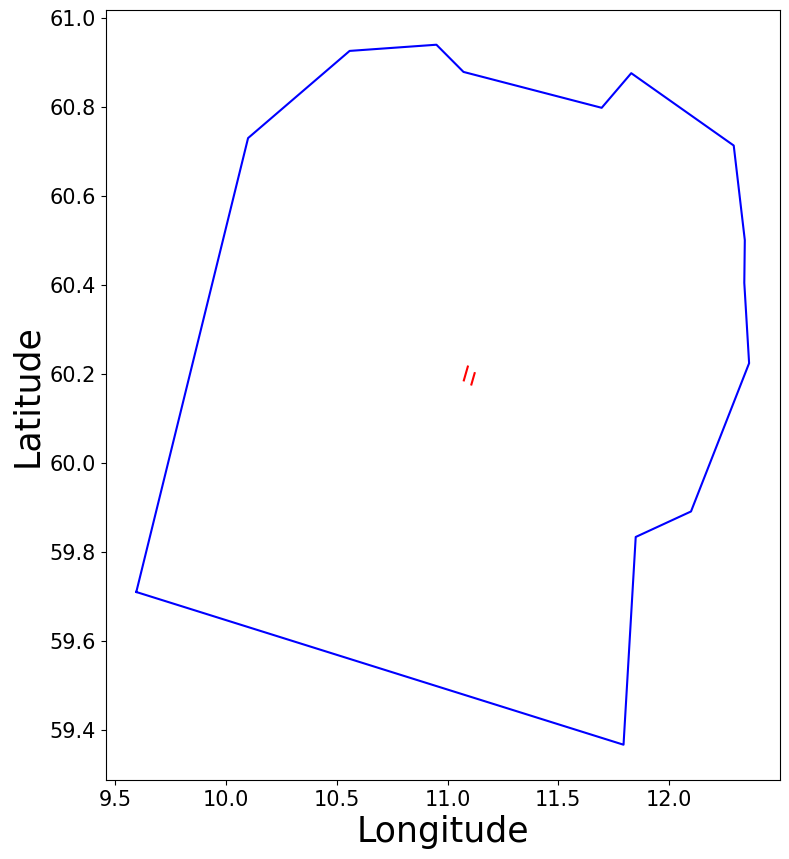

In [17]:
ids_list = ["191007WIF96B", "191018NAX9KP"]
temp_df = pd.DataFrame()
for flight_id in ids_list:
    flight_df = dataset_PM_NORTH_df[dataset_PM_NORTH_df.index.get_level_values('flightId') == flight_id]
    temp_df = pd.concat([temp_df, flight_df])
plot_horizontal_profile_ENGM(temp_df, title = "")

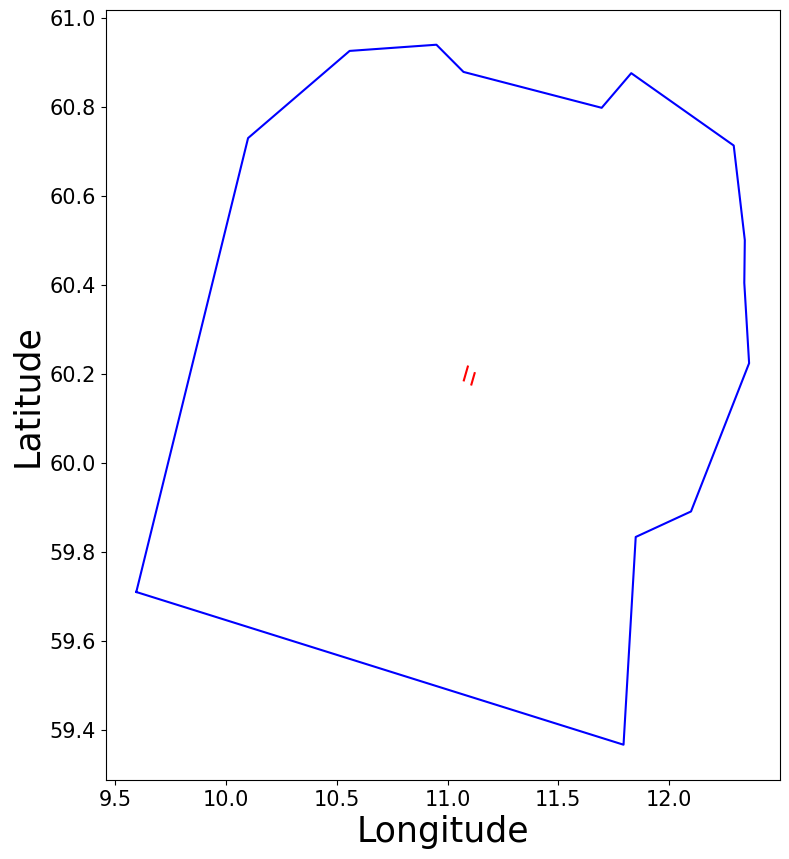

In [18]:
ids_list = ["191009SAS2306", "191016SAS65P"]
temp_df = pd.DataFrame()
for flight_id in ids_list:
    flight_df = dataset_PM_SOUTH_df[dataset_PM_SOUTH_df.index.get_level_values('flightId') == flight_id]
    temp_df = pd.concat([temp_df, flight_df])
plot_horizontal_profile_ENGM(temp_df, title = "")

In [19]:
def check_TMA_contains_point(point):

    lons_lats_vect = np.column_stack((TMA_lon, TMA_lat)) # Reshape coordinates
    polygon = Polygon(lons_lats_vect) # create polygon

    return polygon.contains(point)

In [20]:
plot_trajectories_first_point_ENGM(dataset_PM_NORTH_df, title = "")

191021SAS222
191022SAS802
191023SAS802
191024NAX523
191025SAS411P


In [21]:
plot_trajectories_first_point_ENGM(dataset_PM_SOUTH_df, title = "")

In [22]:
plot_horizontal_profile_ENGM(dataset_nonPM_NORTH_df, title = "")

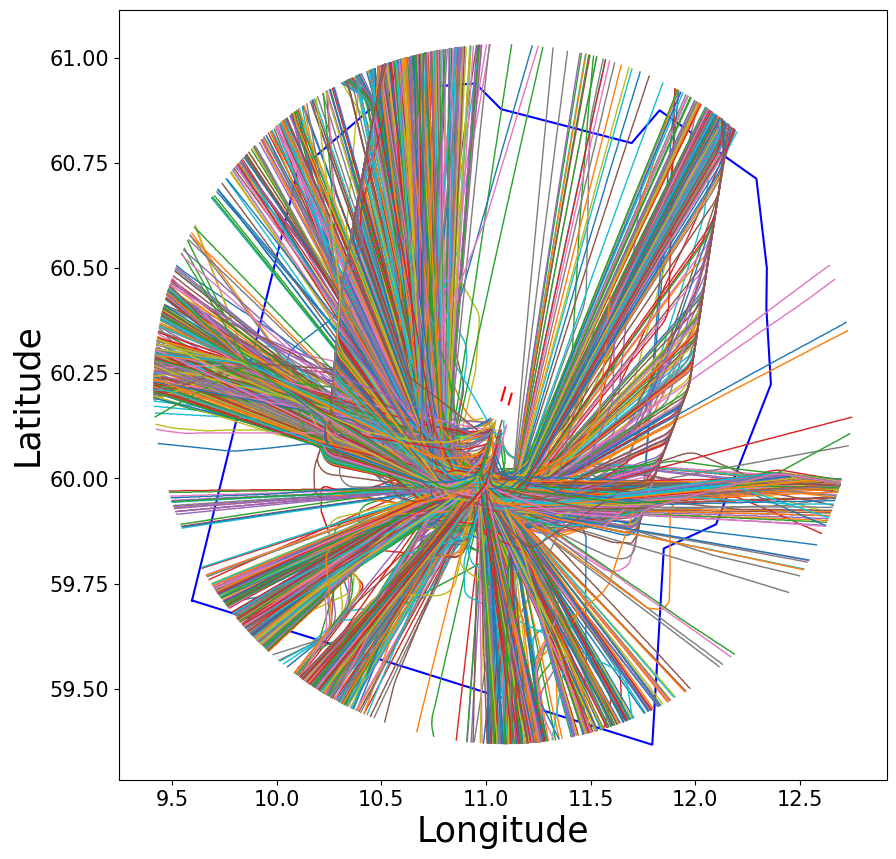

In [23]:
plot_horizontal_profile_ENGM(dataset_nonPM_SOUTH_df, title = "")

In [24]:
plot_horizontal_profile_ENGM(dataset_PM_NORTH_df, title = "")

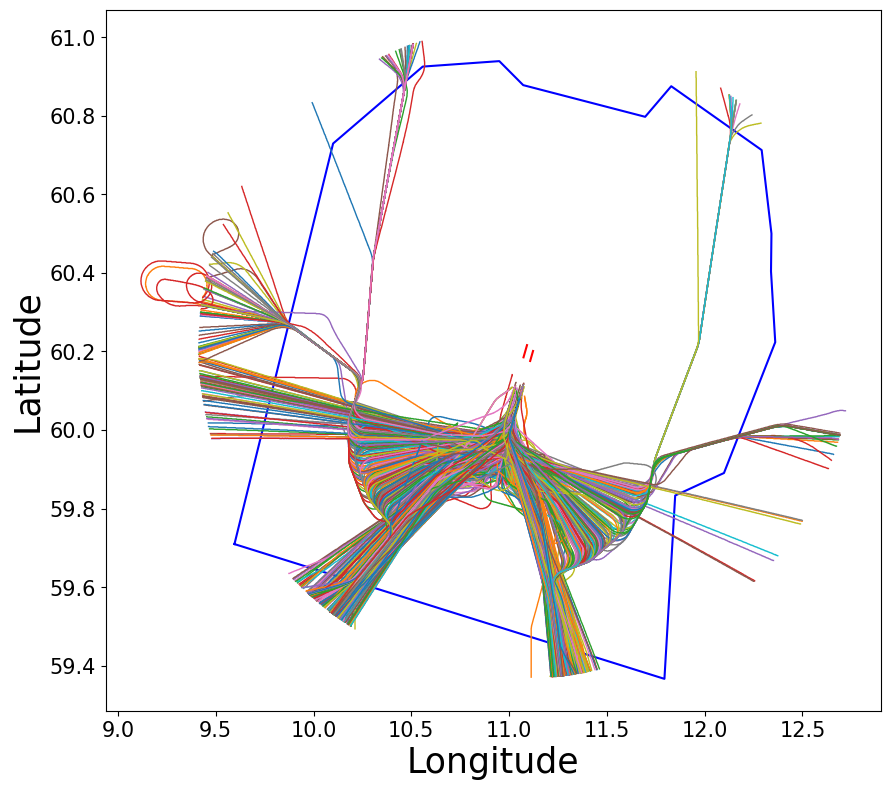

In [25]:
plot_horizontal_profile_ENGM(dataset_PM_SOUTH_df, title = "")

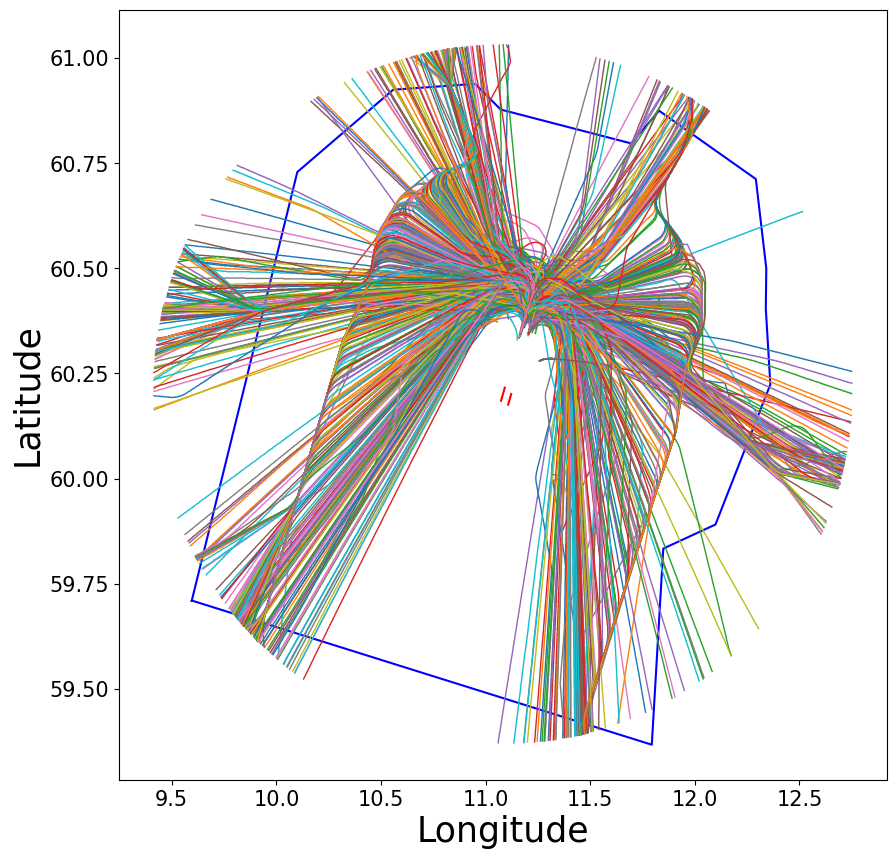

In [26]:
plot_horizontal_profile_ENGM(dataset_TT_NORTH_df, title = "")

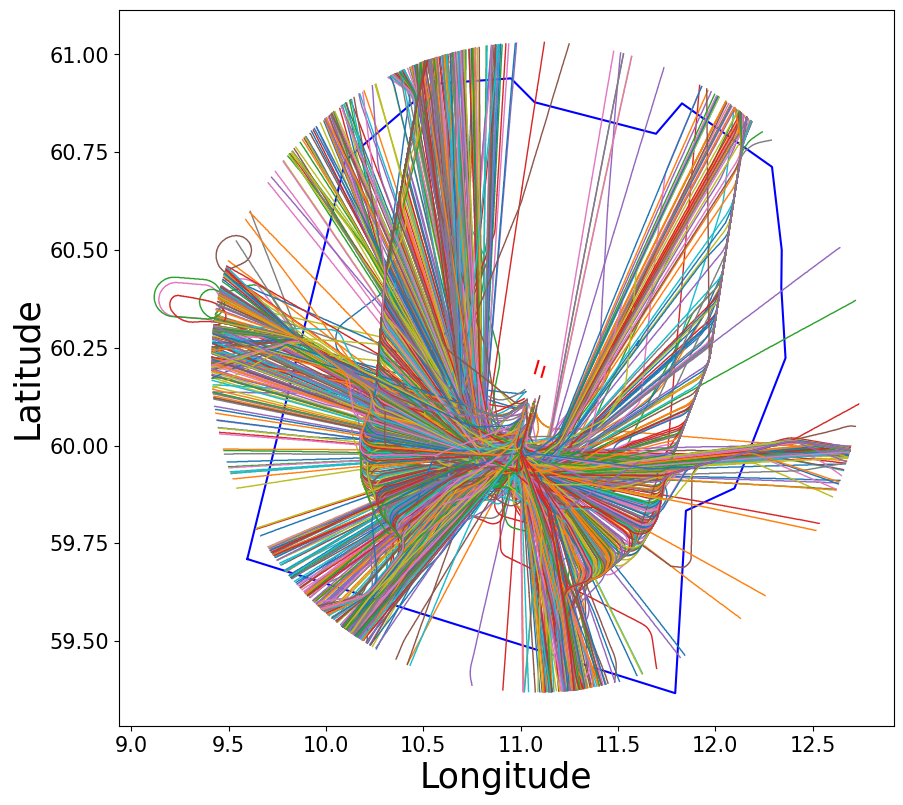

In [27]:
plot_horizontal_profile_ENGM(dataset_TT_SOUTH_df, title = "")

In [28]:
#for flight_id, flight_df in dataset_PM_NORTH_df.groupby(level='flightId'):
#    plot_horizontal_profile_ENGM(flight_df, flight_id)
#    plt.savefig('figures/' + flight_id + '.png')

In [29]:
#for flight_id, flight_df in dataset_PM_SOUTH_df.groupby(level='flightId'):
#    plot_horizontal_profile_ENGM(flight_df, flight_id)
#    plt.savefig('figures/' + flight_id + '.png')

In [30]:
#for flight_id, flight_df in dataset_TT_NORTH_df.groupby(level='flightId'):
#    plot_horizontal_profile_ENGM(flight_df, flight_id)
#    plt.savefig('figures/' + flight_id + '.png')

In [31]:
#for flight_id, flight_df in dataset_TT_SOUTH_df.groupby(level='flightId'):
#    plot_horizontal_profile_ENGM(flight_df, flight_id)
#    plt.savefig('figures/' + flight_id + '.png')

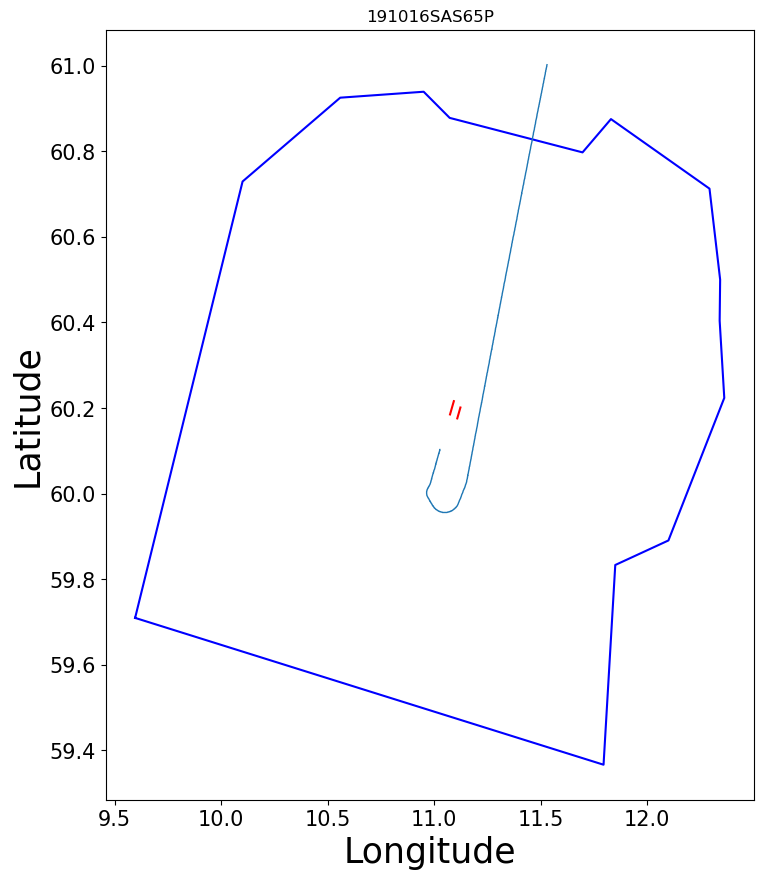

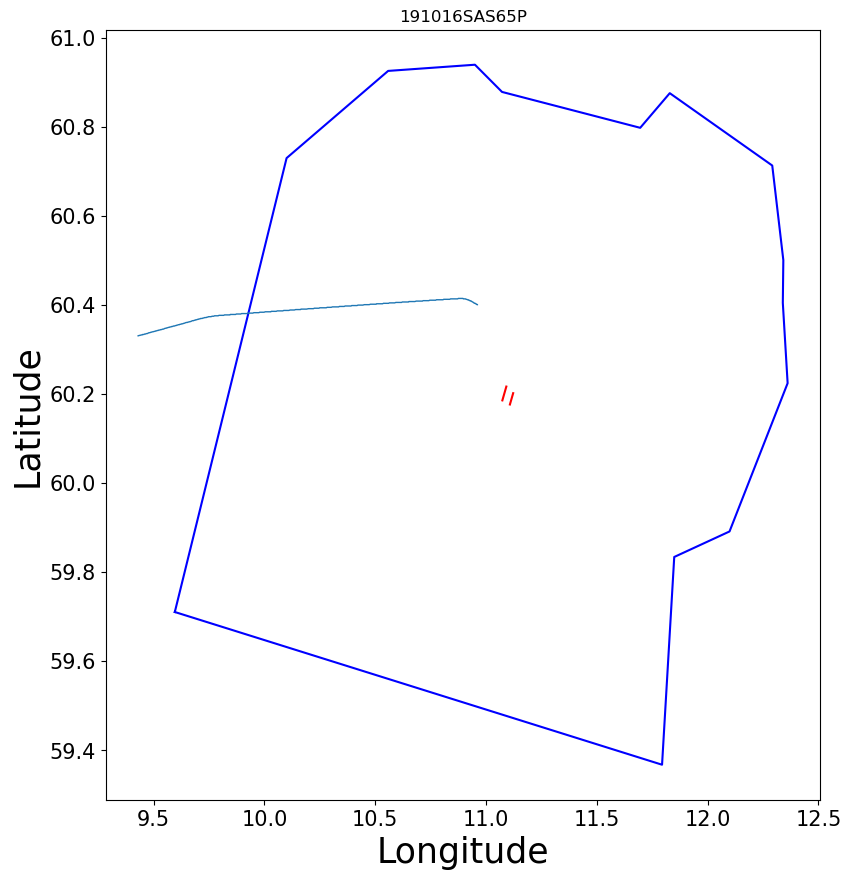

In [32]:
# 191003SAS4095, 191010SAS319
flight_df = dataset_TT_SOUTH_df.loc[['191003SAS4095'],:]
plot_horizontal_profile_ENGM(flight_df, flight_id)
flight_df = dataset_TT_NORTH_df.loc[['191010SAS319'],:]
plot_horizontal_profile_ENGM(flight_df, flight_id)